In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data Analysis

In [7]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<Axes: xlabel='day', ylabel='count'>

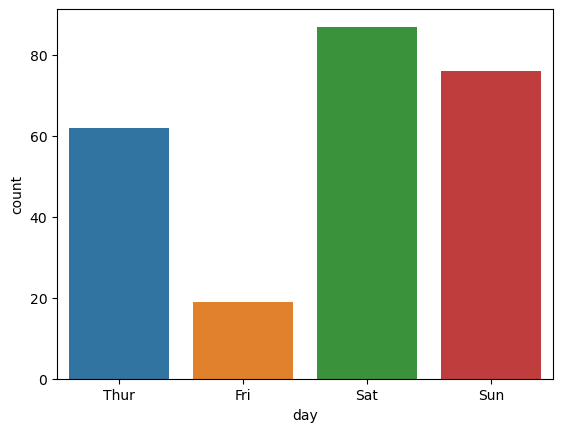

In [12]:
sns.countplot(data=df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])

<Axes: >

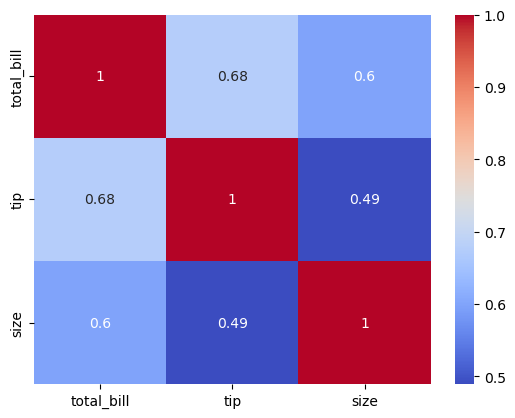

In [34]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

## Linear Regression

In [44]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], dtype=int)
df.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0


In [46]:
X = df.drop('tip', axis=1)
y = df['tip']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [59]:
test_sample = [
    10,  # total_bill
    1,  # size
    1,  # sex_Female
    0,  # sex_Male
    1,  # smoker_No
    0,  # smoker_Yes
    1,  # day_Fri
    0,  # day_Sat
    0,  # day_Sun
    0,  # day_Thur
    1,  # time_Dinner
    0,  # time_Lunch
]

test_pred = model.predict([test_sample])
test_pred

C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.92467935])

---
## Evaluation Methods

### Evaluation for Classification

**1) Accuracy Score**

![accuracy.png](https://cdn.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/https://www.filepicker.io/api/file/1lMtylYQ0m0qVoKJ4Zrg)

**2) Confusion Matrix**

![conf_mat.png](https://cdn.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/https://www.filepicker.io/api/file/h2HZ13YRfS9Ql5Cp12KZ)

**3) Classification Report**

![class_rep.png](https://cdn.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/https://www.filepicker.io/api/file/9OgrchwwRliONoahEwiY)

**Precision** is the ratio of correctly predicted true-positives to the total of predicted positive cases. A high precision score translates to a low number of false-positives.

![precision.png](https://cdn.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/https://www.filepicker.io/api/file/6jdnsMDHQdGuELgFDqlm)

**Recall** is the ratio of correctly predicted true-positives to the total of actual positive cases. This metric addresses the question of how many positive outcomes were rightly classified as positives?

![recall.png](https://cdn.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/https://www.filepicker.io/api/file/WYClL8exQqnr3KmPLspp)

**F1-score** is a weighted average of precision and recall. It’s typically used as a metric for model-to-model comparison rather than internal model accuracy.

**Support** is not an evaluation metric per se but rather a tally of the number of positive and negative cases respectively.

### Evaluation for Regression

**1) MAE** measures the average of the errors in a set of predictions, i.e. how far the regression line is to the actual data points.

**2) RMSE** measures the standard deviation of the prediction errors, which informs how concentrated or spread out prediction errors are in relation to an optimal fit.